![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean() # 10.886

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes[["season","hour"]].describe()

,season,hour
count,10886.000000,10886.000000
mean,2.506614,11.541613
std,1.116174,6.915838
min,1.000000,0.000000
25%,2.000000,6.000000
50%,3.000000,12.000000
75%,4.000000,18.000000
max,4.000000,23.000000


### Analisis descriptivo
Para la variable season encontramos que donde menos se realiza el uso del sistema de bicicletas es en 1:invierno con una cantidad promedio de 116.343261, el mayor uso del sistema se presenta en verano con un valor promedio de 234.417124.

Para la variable hour, se evidencia que la hora de mayor demanda del servicio son las 5 p.m. con un promedio de 468.765351, seguido de las 6 p.m. con 430.859449; las horas de menos demanda del servicio se encuentra en el rango de las 11 p.m. hasta 6 a.m.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

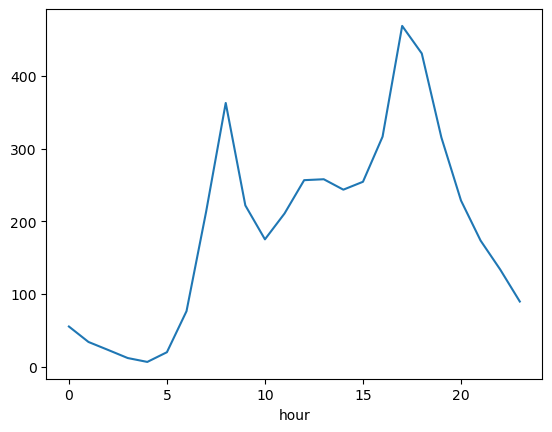

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

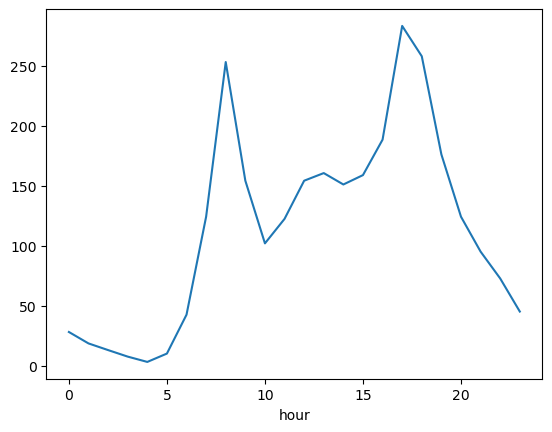

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.loc[bikes['season'] == 1].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

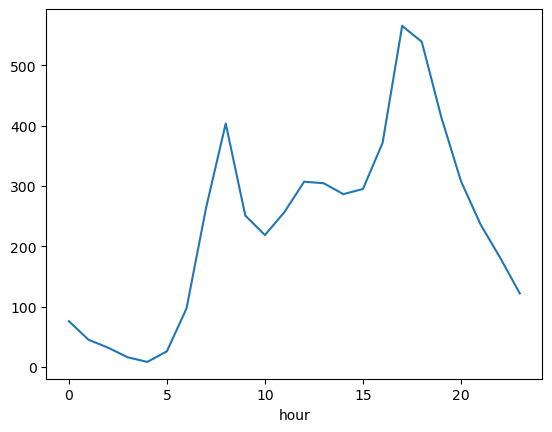

In [9]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.loc[bikes['season'] == 3].groupby('hour').total.mean().plot()

## Hallazgos
En invierno la cantidad maxima en promedio de bicicletas rentadas es de alrededor de 250, con los mayores picos de bicicletas rentadas a las 8 a.m. y de 5 p.m. a 6 p.m.; en cambio en el verano la cantidad de bicicletas rentadas en las mismas horas corresponde a mas del doble, pasando de 250 a mas de 500 entre las 5 p.m. y 6 p.m.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

      Coefficient
1      -76.344568
2       22.685631
3       39.365799
4       14.293138
hour    10.687678
MSE:  25366.611967658602


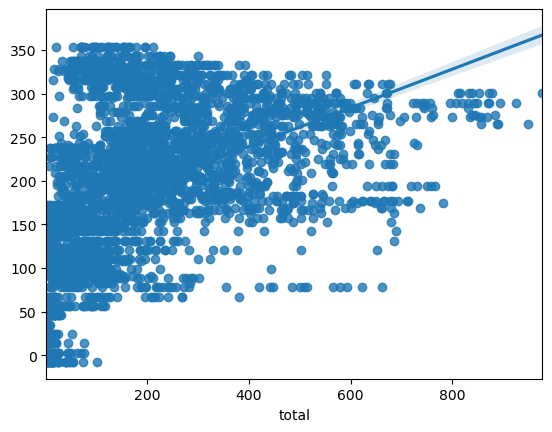

In [10]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

bikes = bikes.reset_index(drop=True)

bikes_dummies_season = pd.get_dummies(data=bikes['season'], drop_first=False)
X = pd.concat([bikes_dummies_season, bikes['hour']], axis=1, join='inner')
y = bikes['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sns.regplot(y_test,y_pred)

coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_parameter)
print("MSE: ", (mean_squared_error(y_test, y_pred)))

Las variables predictoras mas relevantes para el modelo son la variables 3:verano con un coeficiente de 39.3657, 2:primavera con un coeficiente de 22.6856 y 3:otono con un coeficiente de 14.2931; la variable predictora 1:invierno tiene una relacion inversa con la variable de respuesta.

El modelo de regresion lineal no logra un buen ajuste sobre los datos, teniendo muy baja capacidad de prediccion.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4
X = bikes[['season', 'hour']]
y = bikes['total']

max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición  
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [0, 2.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 122.27826086956522,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_pr

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'neg_mean_squared_error')

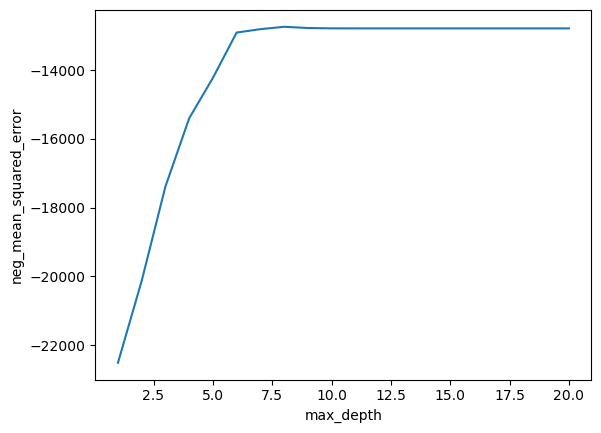

In [12]:
# Celda 5
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

max_depth_range = range(1, 21)
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=42)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, (accuracy_scores))
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')

El desempeno del arbol de decision con una profundidad de 6 es mucho mejor al desempeno del modelo de regresion lineal

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [13]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [14]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [15]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [16]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)    
    
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)    

print('DecisionTreeClassifier LogisticRegression')
print(f1_score(y_test, clf_y_pred), f1_score(y_test, lr_y_pred))
print(accuracy_score(y_test, clf_y_pred), accuracy_score(y_test, lr_y_pred))

DecisionTreeClassifier LogisticRegression
0.5915857605177994 0.6110363391655451
0.5793333333333334 0.6146666666666667


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [38]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

e1_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

e1_clf.fit(X_train, y_train)
e1_y_pred = e1_clf.predict(X_test)
print("Escenario 1: 100 árboles de decisión donde max_depth tome un valor de su elección")
print(accuracy_score(e1_y_pred, y_test), f1_score(e1_y_pred, y_test))

e2_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
e2_clf.fit(X_train, y_train)
e2_y_pred = e2_clf.predict(X_test)
print("Escenario 2: 100 árboles de decisión donde min_samples_leaf tome un valor de su elección")
print(accuracy_score(e2_y_pred, y_test), f1_score(e2_y_pred, y_test))

e3_clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

e3_clf.fit(X_train, y_train)
e3_y_pred = e3_clf.predict(X_test)
print("Escenario 3: 100 regresiones logísticas")
print(accuracy_score(e3_y_pred, y_test), f1_score(e3_y_pred, y_test))

Escenario 1: 100 árboles de decisión donde max_depth tome un valor de su elección
0.6533333333333333 0.6574440052700922
Escenario 2: 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
0.6553333333333333 0.6582947785855915
Escenario 3: 100 regresiones logísticas
0.6173333333333333 0.6126855600539811


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [39]:
# Celda 8
e1_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

e1_clf.fit(X_train, y_train)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(e1_clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], e1_clf.n_estimators))

for i in range(e1_clf.n_estimators):
    oob_sample = ~e1_clf.estimators_samples_[i]
    y_pred_ = e1_clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = e1_clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("Escenario 1: 100 árboles de decisión donde max_depth tome un valor de su elección")
print(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test))

e2_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

e2_clf.fit(X_train, y_train)
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(e2_clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], e2_clf.n_estimators))

for i in range(e2_clf.n_estimators):
    oob_sample = ~e2_clf.estimators_samples_[i]
    y_pred_ = e2_clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = e2_clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("Escenario 2: 100 árboles de decisión donde min_samples_leaf tome un valor de su elección")
print(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test))

e3_clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

e3_clf.fit(X_train, y_train)
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(e2_clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], e2_clf.n_estimators))

for i in range(e3_clf.n_estimators):
    oob_sample = ~e3_clf.estimators_samples_[i]
    y_pred_ = e3_clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = e3_clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("Escenario 3: 100 regresiones logísticas")
print(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test))

Escenario 1: 100 árboles de decisión donde max_depth tome un valor de su elección
0.654 0.6560636182902585
Escenario 2: 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
0.6553333333333333 0.6504394861392833
Escenario 3: 100 regresiones logísticas
0.6193333333333333 0.6139283299526708


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [51]:
# Celda 9
print("Se evidencia un mejor rendimiento del esamble con la metodología de **Votación mayoritaria**")

Se evidencia un mejor rendimiento del esamble con la metodología de **Votación mayoritaria**
